# "The World's Saddest Region": Sub-Saharan Africa

In [44]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from prophet import Prophet
from math import sqrt

In [45]:
happiness = pd.read_csv("Resources/WHR 2005 to 2023.csv")
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [46]:
# Group by both 'Year' and 'Regional Indicator'. Calculate mean of 'Life Ladder'.
region_Life_ladder_mean = happiness.groupby(['Year', 'Regional Indicator'])['Life Ladder'].mean().unstack()

# Life Ladder mean for each Region in each year
region_Life_ladder_mean.head()

Regional Indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2005,5.567262,NaN,6.515817,6.795683,5.676705,7.379368,5.224658,NaN,NaN,7.083090
2006,5.422188,4.834771,5.398228,5.581020,5.870536,7.243404,4.644593,5.147139,4.152997,6.881718
2007,5.152283,4.887174,5.369349,5.838044,5.604301,7.471001,4.893733,5.496605,4.457456,7.020117
2008,5.418225,5.125531,5.220759,5.797573,5.253147,7.350230,4.534499,5.309534,4.254407,7.165480
2009,5.180073,5.070795,5.336026,6.366542,5.498141,7.322928,4.723865,5.253169,4.304473,6.772409


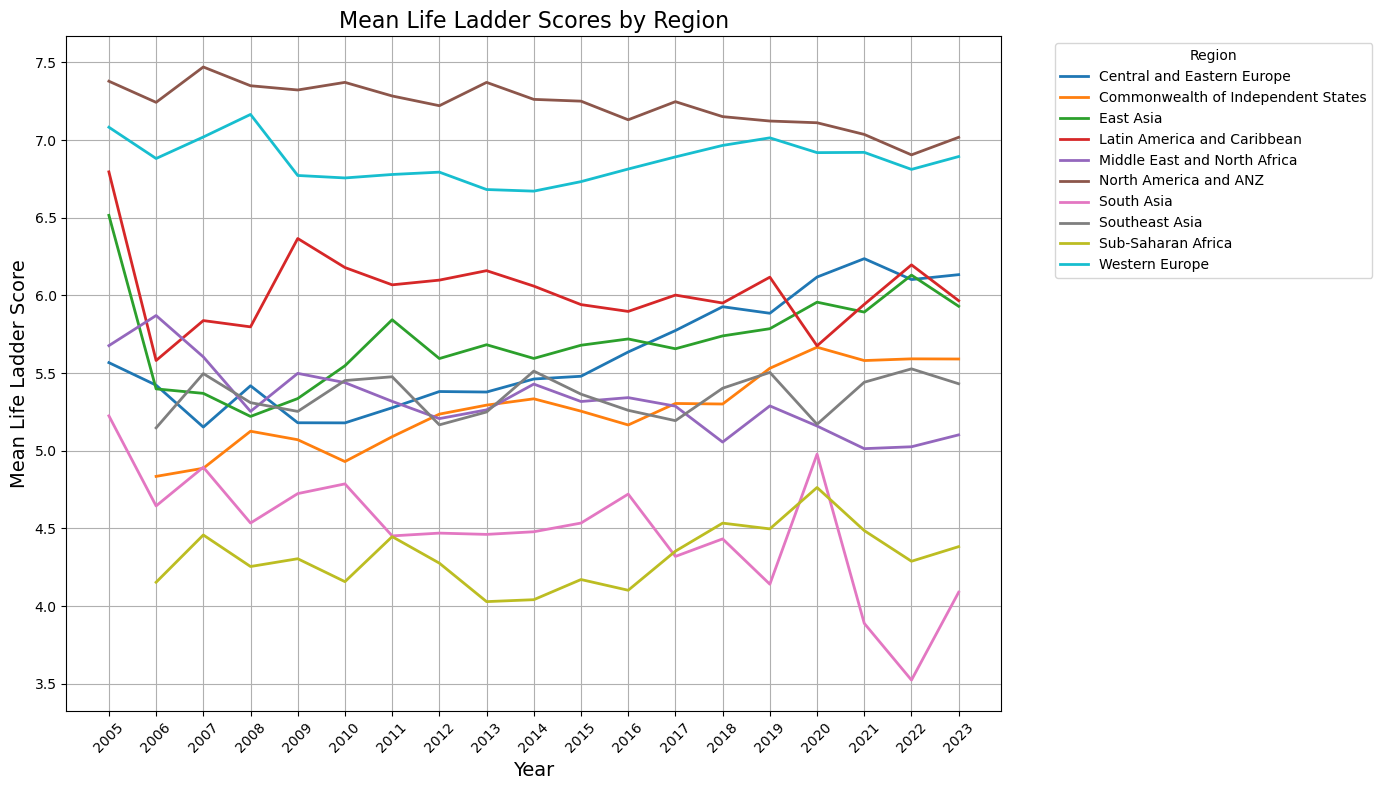

In [47]:
# Plotting
plt.figure(figsize=(14, 8))
for column in region_Life_ladder_mean.columns:
    plt.plot(region_Life_ladder_mean.index, region_Life_ladder_mean[column], marker='', linewidth=2, label=column)

plt.title('Mean Life Ladder Scores by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Life Ladder Score', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Setting to integer for better display on graph
years_int = region_Life_ladder_mean.index.astype(int) 
plt.xticks(ticks=region_Life_ladder_mean.index, labels=years_int, rotation=45)

plt.tight_layout()
plt.show()

In [48]:
# Displaying all unique values in the 'Regional Indicator' column
unique_regions = happiness['Regional Indicator'].unique()
print(unique_regions)

['South Asia' 'Central and Eastern Europe' 'Middle East and North Africa'
 'Sub-Saharan Africa' 'Latin America and Caribbean'
 'Commonwealth of Independent States' 'North America and ANZ'
 'Western Europe' 'Southeast Asia' 'East Asia']


# Sub-Saharan Africa is least happy region, according to the chart

In [49]:
# Filtering for Sub-Saharan Africa
sub_saharan_africa_happiness = happiness[happiness['Regional Indicator'] == 'Sub-Saharan Africa']

sub_saharan_africa_happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
42,Angola,Sub-Saharan Africa,2011,5.589001,8.944346,0.723094,51.220001,0.583702,0.052619,0.911320,0.666833,0.361063,0.232387
43,Angola,Sub-Saharan Africa,2012,4.360250,8.988708,0.752593,51.840000,0.456029,-0.138630,0.906300,0.590808,0.304890,0.237091
44,Angola,Sub-Saharan Africa,2013,3.937107,8.999667,0.721591,52.459999,0.409555,-0.105992,0.816375,0.650047,0.370875,0.547732
45,Angola,Sub-Saharan Africa,2014,3.794838,9.009897,0.754615,53.080002,0.374542,-0.170031,0.834076,0.595249,0.367864,0.572346
191,Benin,Sub-Saharan Africa,2006,3.329802,7.843533,0.444781,51.959999,0.580069,-0.011397,0.789862,0.520846,0.309100,0.540994


# Linear Regression Analysis

In [50]:
# Prepare the data for modeling
X = sub_saharan_africa_happiness[['Year']]
y = sub_saharan_africa_happiness['Life Ladder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lin = lin_reg_model.predict(X_test)
print("Linear Regression R^2 Score:", r2_score(y_test, y_pred_lin))
print("Linear Regression MSE Score:", mean_squared_error(y_test, y_pred_lin))


Linear Regression R^2 Score: 0.007580525386828851
Linear Regression MSE Score: 0.46540910801484875


# Plot Linear Regression

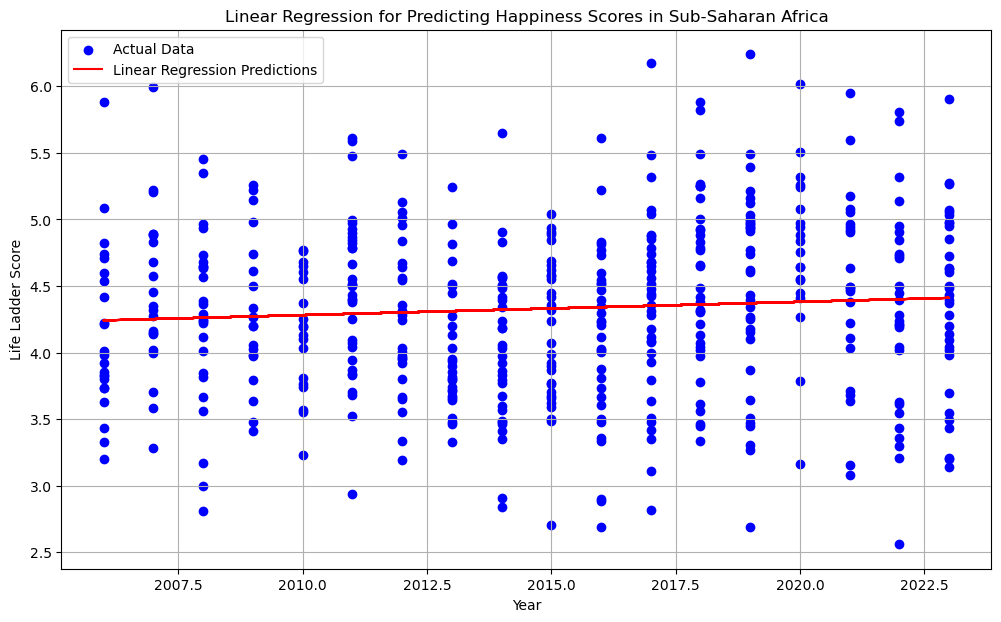

In [51]:
# Plotting Linear Regression results
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lin, color='red', label='Linear Regression Predictions')
plt.title('Linear Regression for Predicting Happiness Scores in Sub-Saharan Africa')
plt.xlabel('Year')
plt.ylabel('Life Ladder Score')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Model (adding features)

In [52]:
# Random Forest 

features = ['Year', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth',
            'Freedom To Make Life Choices', 'Perceptions Of Corruption']
X_features = sub_saharan_africa_happiness[features].dropna() 
y_features = sub_saharan_africa_happiness.loc[X_features.index, 'Life Ladder'] 

# Splitting the data
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_features, y_features, test_size=0.2, random_state=42)

# Model selection
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_feat, y_train_feat)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_feat)
print("Random Forest R^2 Score:", r2_score(y_test_feat, y_pred_rf))
print("Random Forest MSE Score:", mean_squared_error(y_test_feat, y_pred_rf))


Random Forest R^2 Score: 0.4602003599781528
Random Forest MSE Score: 0.22979573823067465


# Adjusted Random Forest

In [53]:
# Adjusted Random Forest (parameters adjusted)
rf_model_tuned = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_split=4, random_state=42)
rf_model_tuned.fit(X_train_feat, y_train_feat)

# Predict and evaluate with the tuned model
y_pred_rf_tuned = rf_model_tuned.predict(X_test_feat)
print("Tuned Random Forest R^2 Score:", r2_score(y_test_feat, y_pred_rf_tuned))
print("Tuned Random Forest MSE Score:", mean_squared_error(y_test_feat, y_pred_rf_tuned))

Tuned Random Forest R^2 Score: 0.45128986641535884
Tuned Random Forest MSE Score: 0.2335889853810044


# Additional changes to Random Forest

In [54]:
# Selecting features and target for the model
features = ['Year', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 
            'Freedom To Make Life Choices', 'Perceptions Of Corruption']
target = 'Life Ladder'

# Ensure no nulls
sub_saharan_africa_happiness = sub_saharan_africa_happiness.dropna(subset=features + [target])

X = sub_saharan_africa_happiness[features]
y = sub_saharan_africa_happiness[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set and evaluating the model
y_pred = rf_model.predict(X_test)

# Calculation of R^2 and MSE scores
r2_score_result = r2_score(y_test, y_pred)
mse_score_result = mean_squared_error(y_test, y_pred)

print("Random Forest with New Features R^2 Score:", r2_score_result)
print("Random Forest with New Features MSE Score:", mse_score_result)

Random Forest with New Features R^2 Score: 0.4602003599781528
Random Forest with New Features MSE Score: 0.22979573823067465


# Prophet Analysis

23:18:19 - cmdstanpy - INFO - Chain [1] start processing
23:18:19 - cmdstanpy - INFO - Chain [1] done processing


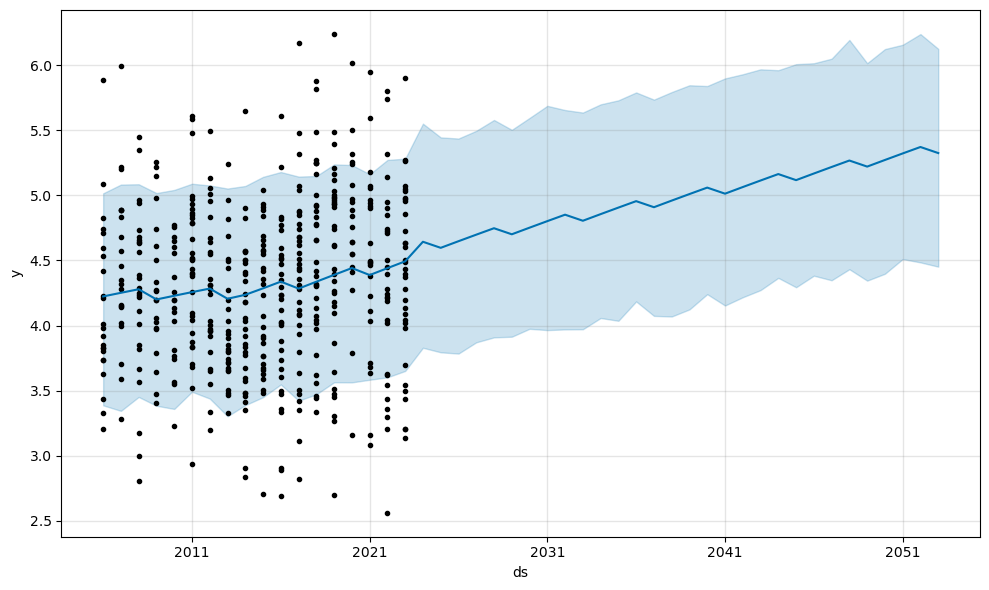

In [55]:
# Filter for Sub-Saharan Africa
sub_saharan_africa = happiness[happiness['Regional Indicator'] == 'Sub-Saharan Africa']

# Prepare the data for Prophet
prophet_data = sub_saharan_africa[['Year', 'Life Ladder']].rename(columns={'Year': 'ds', 'Life Ladder': 'y'})
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'], format='%Y')

# Fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a DataFrame to hold future dates for prediction
future_dates = model.make_future_dataframe(periods=30, freq='Y')

# Use the model to make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)